In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [28]:
# Hyperparameters
batch_size = 64
latent_size = 100
image_size = 64 * 64
hidden_size = 256
epochs = 50
lr = 0.0002

In [29]:
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define the path to the folder containing your dataset
data_dir = r"D:\New_data_2_may\dataset\train"

# Transformation for the images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 28x28 pixels
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset from your local directory
train_data = datasets.ImageFolder(root=data_dir, transform=transform)

# DataLoader for batching and shuffling
batch_size = 64  # Set your desired batch size
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


In [30]:


# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh()
        )

    def forward(self, noise):
        return self.main(noise)


In [31]:

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, image):
        return self.main(image)

In [32]:

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss functions and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [33]:
#yes

In [34]:
# Training loop
for epoch in range(epochs):
    for real_images, _ in train_loader:
        # Flatten images
        real_images = real_images.view(-1, image_size)

        # Train Discriminator
        d_optimizer.zero_grad()

        # Real images
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, torch.ones_like(real_outputs))

        # Fake images
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, torch.zeros_like(fake_outputs))

        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, torch.ones_like(fake_outputs))
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

Epoch [1/50], d_loss: 0.1001, g_loss: 3.9051
Epoch [2/50], d_loss: 0.0528, g_loss: 4.3155
Epoch [3/50], d_loss: 0.0161, g_loss: 7.8529
Epoch [4/50], d_loss: 0.0277, g_loss: 7.8454
Epoch [5/50], d_loss: 0.0097, g_loss: 8.9575
Epoch [6/50], d_loss: 0.0162, g_loss: 7.6571
Epoch [7/50], d_loss: 0.0093, g_loss: 6.7339
Epoch [8/50], d_loss: 0.0899, g_loss: 4.8286
Epoch [9/50], d_loss: 0.0349, g_loss: 7.8405
Epoch [10/50], d_loss: 0.0086, g_loss: 6.1039
Epoch [11/50], d_loss: 0.0268, g_loss: 5.3459
Epoch [12/50], d_loss: 0.0901, g_loss: 4.9787
Epoch [13/50], d_loss: 0.0142, g_loss: 6.1782
Epoch [14/50], d_loss: 0.0115, g_loss: 5.6644
Epoch [15/50], d_loss: 0.0064, g_loss: 6.8995
Epoch [16/50], d_loss: 0.0168, g_loss: 6.4637
Epoch [17/50], d_loss: 0.0009, g_loss: 7.8508
Epoch [18/50], d_loss: 0.0000, g_loss: 19.9343
Epoch [19/50], d_loss: 0.0360, g_loss: 8.4442
Epoch [20/50], d_loss: 0.0109, g_loss: 7.7022
Epoch [21/50], d_loss: 0.1147, g_loss: 6.8934
Epoch [22/50], d_loss: 0.0019, g_loss: 10.

In [35]:
torch.save(generator.state_dict(), 'generator.pth')

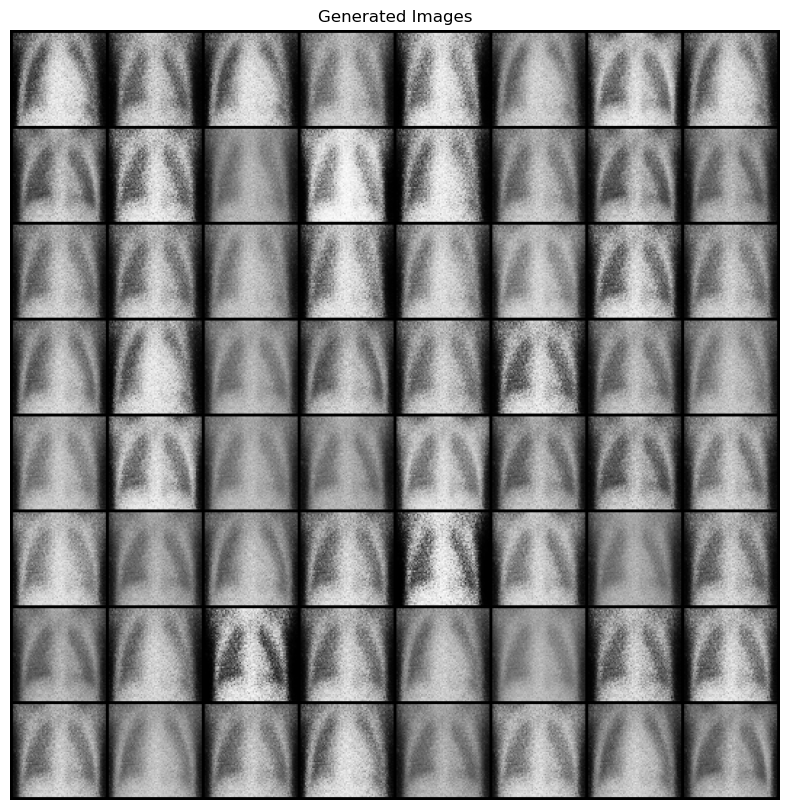

In [36]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

# Load generator weights
generator.load_state_dict(torch.load('generator.pth'))
generator.eval()  # Set the generator to evaluation mode

# Generate synthetic images
noise = torch.randn(batch_size, latent_size)
fake_images = generator(noise)

# Reshape the images to the correct format
fake_images = fake_images.view(batch_size, 1, 64, 64)

# Display the generated images
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(fake_images[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()